In [1]:
import pandas as pd
import plotly

In [16]:
import plotly.dashboard_objs as dashboard
import IPython.display
from IPython.display import Image
import plotly.graph_objs as go
import plotly.plotly as py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [137]:
#After importing some libraries time to load the dataset and dig into some simple analysis

In [6]:
df = pd.read_csv('featureDataWeekOne.csv')

In [7]:
sns.set(style="whitegrid")
df.head(5)

,Unnamed: 0,user_id,date,country,feature_engagement,games_played,revenue
0,1,2,2015-10-01,JP,False,2,0.0
1,2,3,2015-10-01,JP,False,3,0.0
2,3,4,2015-10-01,US,False,1,0.0
3,4,5,2015-10-01,CA,False,4,0.0
4,5,6,2015-10-01,JP,True,6,0.0


In [13]:
#An example of the Excel filtering requests, DE and US biggest spenders 
print df.groupby('country')['revenue'].mean()
df[df['feature_engagement'] == True].sort_values(by='games_played', ascending=False)[:5]

country
CA    1.559631
DE    1.859415
JP    1.696122
UK    1.438018
US    1.794143
Name: revenue, dtype: float64


,Unnamed: 0,user_id,date,country,feature_engagement,games_played,revenue
3610,3611,1436,2015-10-02,JP,True,130,0.000000
12839,12840,722,2015-10-06,UK,True,70,0.000000
4125,4126,2055,2015-10-02,UK,True,69,0.000000
9658,9659,2859,2015-10-04,DE,True,68,0.000000
11875,11876,2548,2015-10-05,DE,True,67,28.616642


In [119]:
print df.groupby('feature_engagement')['games_played'].mean()
print df.groupby('feature_engagement')['revenue'].mean()
#feature_engagement is a success from an aggregate view on both desired metrics

feature_engagement
False    4.360819
True     7.031304
Name: games_played, dtype: float64
feature_engagement
False    1.533542
True     1.771613
Name: revenue, dtype: float64


DE    3541
JP    3517
CA    3509
UK    3286
US    3278
Name: country, dtype: int64
country  feature_engagement
CA       False                 4.811615
         True                  6.999046
DE       False                 4.286951
         True                  7.008828
JP       False                 4.203166
         True                  7.168916
UK       False                 4.214235
         True                  7.073380
US       False                 4.303843
         True                  6.904687
Name: games_played, dtype: float64


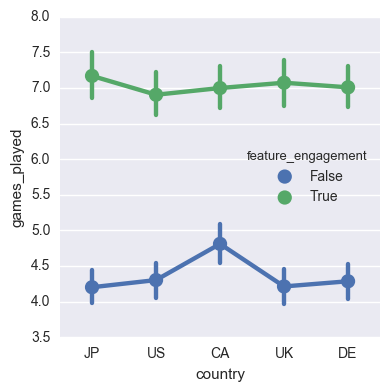

In [30]:
#Sample size of each country cohort relatively stable, increases in games played across the board
sns.factorplot(x="country", y="games_played", hue="feature_engagement", data=df, legend_out=False)
print df['country'].value_counts()
print df.groupby(['country', 'feature_engagement'])['games_played'].mean()

4    2472
1    2463
0    2463
6    2446
2    2434
5    2432
3    2421
Name: day_of_week, dtype: int64


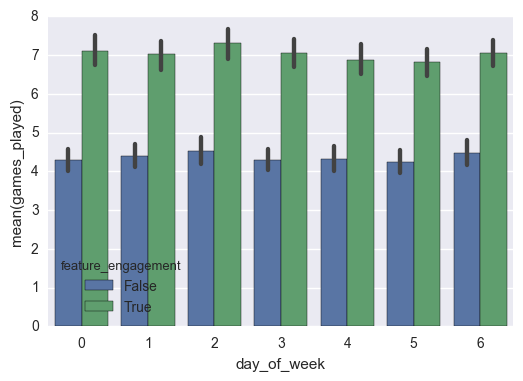

In [140]:
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek
#The day of the week with Monday=0, Sunday=6
print df['day_of_week'].value_counts()
sns.barplot(x='day_of_week', y='games_played', hue='feature_engagement', data=df)
#very stable growth in games played as a result of the new feature

country  feature_engagement
CA       False                 1.574593
         True                  1.549556
DE       False                 1.718185
         True                  1.963450
JP       False                 1.405907
         True                  1.915996
UK       False                 1.391248
         True                  1.473564
US       False                 1.577134
         True                  1.951729
Name: revenue, dtype: float64

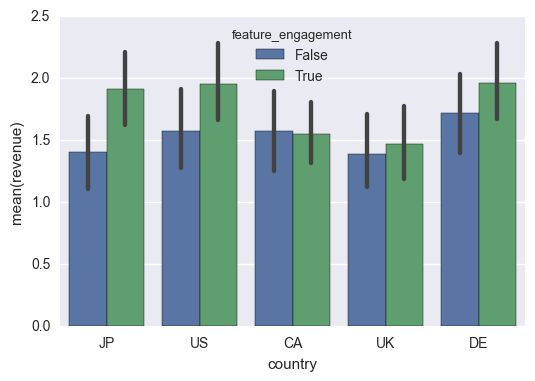

In [34]:
sns.barplot(x='country', y='revenue', hue='feature_engagement', data=df)
df.groupby(['country', 'feature_engagement'])['revenue'].mean()
#Canada and the UK not spending more with new feature

day_of_week  feature_engagement
0            False                 1.500505
             True                  1.573425
1            False                 1.425469
             True                  1.536914
2            False                 1.633908
             True                  1.808749
3            False                 1.648302
             True                  2.004438
4            False                 1.661947
             True                  1.625373
5            False                 1.456236
             True                  1.989750
6            False                 1.408285
             True                  1.869670
Name: revenue, dtype: float64

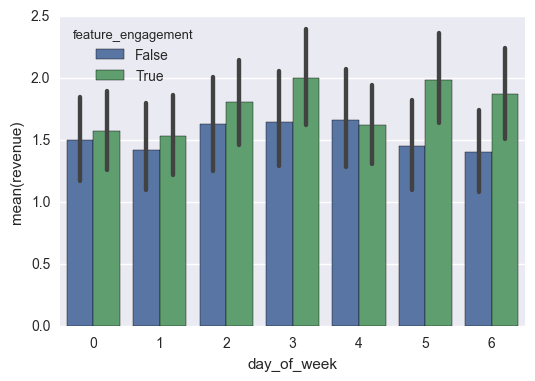

In [72]:
sns.barplot(x="day_of_week", y="revenue", hue="feature_engagement", data=df)
df.groupby(['day_of_week', 'feature_engagement'])['revenue'].mean()
#revenue decay over the course of the week

In [158]:
#summary statistics of users playing during the week and users engaging with the feature during the week
print df['user_id'].value_counts().describe()
print df[df['feature_engagement'] == True]['user_id'].value_counts().describe()

count    2997.000000
mean        5.716049
std         1.312027
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max         7.000000
Name: user_id, dtype: float64
count    2794.000000
mean        3.544381
std         1.589551
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: user_id, dtype: float64


In [95]:
print df.groupby('day_of_week')['feature_engagement'].value_counts()
print df.groupby('country')['feature_engagement'].value_counts()
#more than half of the daily users and country segmented users are engaging the feature

day_of_week  feature_engagement
0            True                  1388
             False                 1075
1            True                  1443
             False                 1020
2            True                  1426
             False                 1008
3            True                  1382
             False                 1039
4            True                  1433
             False                 1039
5            True                  1424
             False                 1008
6            True                  1407
             False                 1039
Name: feature_engagement, dtype: int64
country  feature_engagement
CA       True                  2097
         False                 1412
DE       True                  2039
         False                 1502
JP       True                  2001
         False                 1516
UK       True                  1867
         False                 1419
US       True                  1899
         False   

In [159]:
df.head(5)

,Unnamed: 0,user_id,date,country,feature_engagement,games_played,revenue,day_of_week,gp2
0,1,2,2015-10-01,JP,False,2,0.0,3,0-5
1,2,3,2015-10-01,JP,False,3,0.0,3,0-5
2,3,4,2015-10-01,US,False,1,0.0,3,0-5
3,4,5,2015-10-01,CA,False,4,0.0,3,0-5
4,5,6,2015-10-01,JP,True,6,0.0,3,5-10


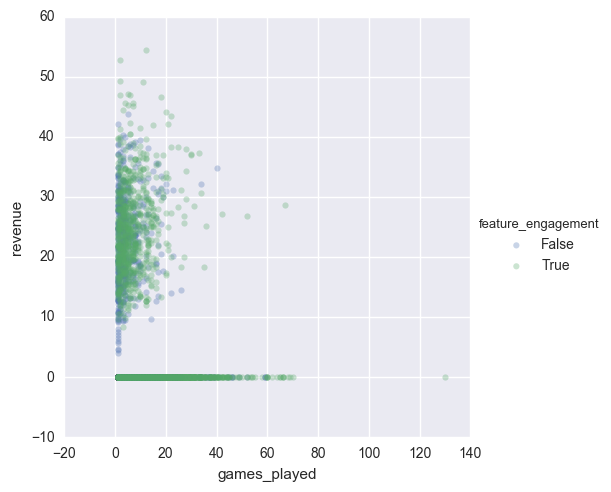

In [141]:
sns.lmplot('games_played', 'revenue', data=df, hue='feature_engagement', fit_reg=False, scatter_kws={'alpha':0.3})
#strong difference between casual (under 20 games per day) and hardcore players (20+ games played and refuse to spend)

In [118]:
df['gp2'] = pd.cut(df['games_played'], [0, 5, 10, 15, 20, 30, 50, 1000], labels=['0-5', '5-10', '10-15', '15-20', '20-30', '30-50', '50+'])
df.head(5)

,Unnamed: 0,user_id,date,country,feature_engagement,games_played,revenue,day_of_week,gp2
0,1,2,2015-10-01,JP,False,2,0.0,3,0-5
1,2,3,2015-10-01,JP,False,3,0.0,3,0-5
2,3,4,2015-10-01,US,False,1,0.0,3,0-5
3,4,5,2015-10-01,CA,False,4,0.0,3,0-5
4,5,6,2015-10-01,JP,True,6,0.0,3,5-10


In [115]:
df.groupby('gp2')['feature_engagement'].mean()
#the more games you play the more likely you are to use the feature

gp2
0-5      0.491400
5-10     0.701726
10-15    0.764291
15-20    0.758389
20-30    0.757143
30-50    0.763975
50+      0.857143
Name: feature_engagement, dtype: float64

In [138]:
true_vals = df[df['feature_engagement'] == True].groupby('day_of_week').mean()
true_revs,true_gp = true_vals['revenue'].values, true_vals['games_played'].values
false_vals = df[df['feature_engagement'] == False].groupby('day_of_week').mean()
false_revs,false_gp = false_vals['revenue'].values, false_vals['games_played'].values
true_vals

,Unnamed: 0,user_id,feature_engagement,games_played,revenue
day_of_week,,,,,
0,11012.845821,1510.634726,True,7.110951,1.573425
1,13471.375606,1496.474012,True,7.015246,1.536914
2,15916.605189,1495.151473,True,7.309257,1.808749
3,1212.053546,1500.038350,True,7.052098,2.004438
4,3646.590370,1479.662945,True,6.875785,1.625373
5,6107.250702,1489.297051,True,6.814607,1.989750
6,8535.468372,1489.113006,True,7.044776,1.869670


In [133]:
trace1 = go.Bar(
    x=['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    y=true_revs,
    name='True'
)
trace2 = go.Bar(
    x=['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    y=false_revs,
    name='False'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

In [136]:
trace1 = go.Bar(
    x=['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    y=true_gp,
    name='True'
)
trace2 = go.Bar(
    x=['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    y=false_gp,
    name='False'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar2')

In [150]:
us_rev = df[df['country'] == 'US'].groupby('day_of_week')['revenue'].sum().values
uk_rev = df[df['country'] == 'UK'].groupby('day_of_week')['revenue'].sum().values
ca_rev = df[df['country'] == 'CA'].groupby('day_of_week')['revenue'].sum().values
de_rev = df[df['country'] == 'DE'].groupby('day_of_week')['revenue'].sum().values
jp_rev = df[df['country'] == 'JP'].groupby('day_of_week')['revenue'].sum().values

In [151]:
trace0 = go.Scatter(
    x = ['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    y = us_rev,
    mode = 'lines+markers',
    name = 'US'
)
trace1 = go.Scatter(
    x = ['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    y = uk_rev,
    mode = 'lines+markers',
    name = 'UK'
)
trace2 = go.Scatter(
    x = ['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    y = ca_rev,
    mode = 'lines+markers',
    name = 'CA'
)
trace3 = go.Scatter(
    x = ['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    y = de_rev,
    mode = 'lines+markers',
    name = 'DE'
)
trace4 = go.Scatter(
    x = ['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    y = jp_rev,
    mode = 'lines+markers',
    name = 'JP'
)
data = [trace0, trace1, trace2, trace3, trace4]

py.iplot(data, filename='line-mode')